In this new version of the testing space I will be tweaking at the response function I created in order to generate some sort of look up table which will be used to help design the response function for each detector, as well as the chi squared response! 

Original Functions
==========

In [ ]:

def chiresponse(A):
    """
    The response function used in the chi squared fitting portion of the simulation. 
    Meant to imitate the actual response of a scintillator.
    Inputs 2 vectors, and responds with a cos^x dependence.
    
    Parameters
    ----------
    A : float
        The angle between the two vectors who's response is meant to be imitated. 

    Returns
    -------

    A : float
        The cosine dependence based on the angle, includes a mask so that terms corresponding to angular separations beyond pi/2 are 0, imitating what would happen if a GRB didn't strike the face of a detector. Further simulations of this effect are neccessary in a different software package to confirm this assumption, but its okay for now. 

    """
    #meant to imitate the response of the detectors for effective area vs. angle, found to be around .77
 #   print(length(A),length(B))
#if cosine is negative, 

    mask = A > np.pi/2.

    A[mask] = 0
    A[~mask] = pow(abs(np.cos(A[~mask])),0.76)
    
    
    return A

def response(A):
    """
    Meant to imitate the actual response of a scintillator.
    Inputs 2 vectors, and responds with a cos^x dependence.
    
    Parameters
    -----------
    A : float
        The angular separation in radians between the normal vector of the detector, and the position in the sky of the simulated GRB. 

    Returns
    -------
    R : float
        The response function of how the scintillator will respond to a source at angle A. 

    """
    #meant to imitate the response of the detectors for effective area vs. angle, found to be around .77
 #   print(length(A),length(B))
#if cosine is negative, 

    R = pow(abs(np.cos(A)),0.76)
    
    
    return R         



First of all, there's no real reason for there to be two of these in the first place. Response should be replaced by the "chiresponse" version in all places in the code,and just for simplicity rename that response. 

In [ ]:
def response(A):
    """
    Meant to imitate the actual response of a scintillator.
    Inputs 2 vectors, and responds with a cos^x dependence.
    
    Parameters
    ----------
    A : float
        The angle between the two vectors who's response is meant to be imitated. 

    Returns
    -------

    A : float
        The cosine dependence based on the angle, includes a mask so that terms corresponding to angular separations beyond pi/2 are 0, imitating what would happen if a GRB didn't strike the face of a detector. Further simulations of this effect are neccessary in a different software package to confirm this assumption, but its okay for now. 

    """
    mask = A > np.pi/2.

    A[mask] = 0
    A[~mask] = pow(abs(np.cos(A[~mask])),0.76)
    
    
    return A

Now I want to make a lookup table for each detector, note each has a different normal, and in these different domains have varying response functions. Let's do a dumb one now.

In [ ]:
import numpy as np
def response(detnorm,skyvec):
    """
    Meant to imitate the actual response of a scintillator.
    Inputs 2 vectors, and responds with a cos^x dependence.
    
    Parameters
    ----------
    detnorm : array
        The normal vector of the detector. 
    skyvec : array
        The position of GRB in xyz coord. 

    Returns
    -------

    A : float
        The cosine dependence based on the angle, includes a mask so that terms corresponding to angular separations beyond pi/2 are 0, imitating what would happen if a GRB didn't strike the face of a detector. Further simulations of this effect are neccessary in a different software package to confirm this assumption, but its okay for now. 

    """
    from burstutils import findAngles   
    from healpy import ang2vec,vec2ang 
    theta,phi = vec2ang(skyvec)
    A = findAngles(detnorm,skyvec)

    if theta[0]  < np.pi/8:
        mask = A > np.pi/2

        A[mask] = 0
        A[~mask] = pow(abs(np.cos(A[~mask])),1)
    else:
        mask = A > np.pi/2

        A[mask] = 0
        A[~mask] = pow(abs(np.cos(A[~mask])),.75)
    

    
        
    return A

This appears to be a VERY simple version of this code which changes the response function based on where the theta and phi are of the GRB. Is this right? 

I think you’re trying too hard to make the cos(theta) dependence work in that function.  You probably should just have a 2-d array that gives the response for a given zenith and phi direction.

In [ ]:
import numpy as np
def response(detnorm,skyvec):
    """
    Meant to imitate the actual response of a scintillator.
    Inputs 2 vectors, and responds with a cos^x dependence.
    
    Parameters
    ----------
    detnorm : array
        The normal vector of the detector. 
    skyvec : array
        The position of GRB in xyz coord. 

    Returns
    -------

    A : float
        The cosine dependence based on the angle, includes a mask so that terms corresponding to angular separations beyond pi/2 are 0, imitating what would happen if a GRB didn't strike the face of a detector. Further simulations of this effect are neccessary in a different software package to confirm this assumption, but its okay for now. 

    """
    from burstutils import findAngles   
    from healpy import ang2vec,vec2ang 
    theta,phi = vec2ang(skyvec)
    A = findAngles(detnorm,skyvec)

    if theta[0]  < np.pi/8:
        mask = A > np.pi/2

        A[mask] = 0
        A[~mask] = pow(abs(np.cos(A[~mask])),1)
    else:
        mask = A > np.pi/2

        A[mask] = 0
        A[~mask] = pow(abs(np.cos(A[~mask])),.75)
    

    
        
    return A

In [ ]:
look_up_table(0,0)

This seems to be the right idea, next I think I need to be able to assign each of these little dots a different response, is this just done through a series of if statements? Anything easier to do?

In [ ]:
def look_up_table(zenith,azimuth,GRBpos):
    """2D Array that gives the response for a given zenith and phi.
    Parameters
    ----------
    
    zenith : float
        The point in the sky or celestial sphere directly above an observer (in rad).
    azimuth : float
        The horizontal angle (in rad) 

    Returns 
    -------
    response : float
        Response of the detector given zenith and phi direction.
    """
    #Create a linear gradient
    
    #having trouble, how do I combine this into a gradient such that as theta and phi vary, this doesnt! 
        
    if GRBpos>zenith + pi/4:
        x = .5

#Something like this. 
    #Keep going for these specifications, but need to create a 
    #linear gradient. 
    return x


In [ ]:
np.gradient?

In [ ]:
import numpy as np

Order of events:

1. GRB is at a certain position
2. Detector (A,B,C,D) is oriented at a certain position
3. Angle is calculated between GRB and Detector, with that a response is generated
    Depending on the detector's zenith due to shadowing effects of other features of BurstCube, this response changes.
   

In [ ]:
def response(skypos,detnorm):
    GRBpos = hp.vec2ang(skypos)
    #Returns [theta,phi]
    detzenith,detaz = hp.vec2ang(detnorm)
    dependence = lookuptable(dettheta,detphi)
    x = lookuptable(skypos,detzenith,detaz)
    #This lookup table will return the dependence of the detector. 
     A = findAngles(detnorm,skyvec)
    mask = A > np.pi/2

    A[mask] = 0
        
    A[~mask] = pow(abs(np.cos(A[~mask])),dependence)
    
    return A
    

In [ ]:
def look_up_table(GRBpos,detzenith,detaz):
    """2D Array that gives the response for a given zenith and phi.
    Parameters
    ----------
    
    zenith : float
        The point in the sky or celestial sphere directly above an observer (in rad).
    azimuth : float
        The horizontal angle (in rad) 

    Returns 
    -------
    x : float
        Response of the detector given zenith and phi direction.
    """
    #Create a linear gradient for one example 
    #starts as 1, goes to 0.
    
    #This is a very rough version of a gradient. Obviously not correct 
    #since I'd need to do this an infinite amount of times.
    #So how do I create a modifying function? 
    if GRBpos == zenith:
        x =1
    if GRBpos>zenith + pi/4:
        x = .5

#Something like this. 
    #Keep going for these specifications, but need to create a 
    #linear gradient. 
    return x


Update 3/27
----------


Ignore everything up there. Starting in the simplest case, a look up table where I'm considering phi vs. theta, and as it goes through each it'll look like a 2D range

2D array? Box |
"

In [ ]:
import numpy as np

In [ ]:
np.matrix(np.arange(90),np.arange(180))

In [ ]:
theta = np.linspace(0,90,91)
phi = np.linspace(0,180,181)

In [ ]:
arr = [theta,phi]

In [ ]:
xx, yy = np.meshgrid(theta,phi)

In [ ]:
import random

In [ ]:
cols, rows = 5, 5;
Matrix = [[random.random() for x in range(cols)] for y in range(rows)] 

In [ ]:
Matrix

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from burstutils import findAngles   
import healpy as hp

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
normal = [0,0]
#must convert these to vectors next in order to find angles. 
X = np.arange(0, 90, 1)
Y = np.arange(0, 180, 1)
Xs, Ys = np.meshgrid(X, Y)
#need to create an identical matrix of 0,0,0 at every point 
norm = [[[0,0,0] for i in range(len(Y))] for j in range(len(X))]

In [ ]:
np.shape(vecs)

In [ ]:
vecs[0]

In [ ]:
findAngles(norm[0],vecs[0])

In [ ]:
len(Xs)

In [ ]:
vecs = hp.ang2vec(np.deg2rad(Xs),np.deg2rad(Ys)) 
angs = findAngles(norm,vecs)
R = np.cos(angs)

In [ ]:
# Plot the surface.
surf = ax.plot_surface(Xs, Ys, R, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
angs

In [ ]:
from burstutils import angle

In [ ]:
np.cos?

In [ ]:
matrix = [[0 for i in xrange(5)] for i in xrange(5)]


In [ ]:
norm = [[[0,0,0] for i in range(5)] for j in range(3)]

In [ ]:
%matplotlib inline

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 90, 1)
Y = np.arange(0, 180, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(np.deg2rad(X))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)



In [ ]:
ax.plot_surface?

I'm having trouble making this a 2d cosine. How do you include phi as well? I tried to make a matrix of normal vectors above and use that as a means to calculate the angle for any theta and phi combo, but that didn't work and I couldn't figure out why.

In [ ]:
import healpy as hp

To make this 2d cosine I'm goint to make 2 matrices, same size where one is of all the normal at every spot, and the other has the position in xyz of all the sky.

In [ ]:
for i in range(len(x)):
    for j in range(len(x[i])):
        print(x[i][j])

In [ ]:
from burstutils import angle

In [ ]:
angle?

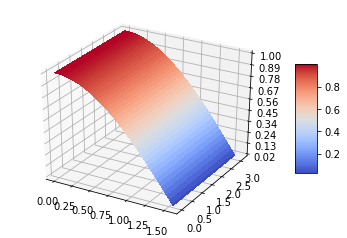

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from burstutils import angle
import healpy as hp

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.deg2rad(np.arange(0, 90, 1))
Y = np.deg2rad(np.arange(0, 180, 1))
X, Y = np.meshgrid(X, Y)
#need to make this vector matrix earlier on.
vecs = []
for i in range(len(X)):
    vecs.append(hp.ang2vec(X[i],Y[i]))
    
norm = [[[0,0,1] for i in range(len(X[0]))] for j in range(len(Y))]

#now to iterate through every point in these 2 matrices, and calculate the angle btw each 
angs = []
for i in range(len(norm)): #loop through rows
    angrow = []
    for j in range(len(norm[0])): #val at each

        angrow.append(angle(norm[i][j],vecs[i][j]))
       # print(angle(norm[i][j],vecs[i][j]))
    angs.append(angrow)

R = np.cos(angs)

# Plot the surface.
surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)



In [ ]:
print(np.shape(X),np.shape(Y),np.shape(vecs),np.shape(norm),np.shape(angs),np.shape(R))

In [ ]:
Y[2]

In [ ]:
np.pi/6

In [ ]:
hp.ang2vec?

In [ ]:
len(X)

In [ ]:
#shows that its working. This is all thetas at phi = 0. #Onward!
np.rad2deg(hp.vec2ang(vecs[0]))

In [ ]:
len(X[0])

In [ ]:
len(Y[0])